# Statistics, Visualization and Web Scrapping

For this notebook, I will be using the Abalone dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Abalone) (originating from the Marine Research Laboratories – Taroona). This dataset is already in my folder (under `abalone.csv`).You can download it at the above link. 

![Abalone](./abalone.jpg)

### A Brief History of Abalones

An abalone is a sea snail belonging to one of a range of 30 to 130 species (depending on which scientist you ask). It is commonly prized for its mother-of-pearl shell, pearls, and delicious flesh by a variety of cultures and has long been a valuable source of food in its native environments. Sadly, wild populations of abalone have been overfished and poached to the point where commercial farming supplies most of abalone flesh nowadays. It now sits on the list of current animals threatened by extinction.

Source: https://en.wikipedia.org/wiki/Abalone

---

## Part 1: Familiarize Yourself With the Dataset

The purpose of this dataset is to predict the age of an abalone through physical characteristics, determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. 

Below is the dataset description from the UCI Machine Learning Repository. 

|Name	|	Data Type|	Measure	|Description|
|	----	|	---------|	-----	|-----------|
|	Sex		|nominal		|	|M, F, and I (infant)|
|	Length	|	continuous	|mm|	Longest shell measurement|
|	Diameter	|continuous|	mm	|perpendicular to length|
|	Height	|	continuous	|mm	|with meat in shell|
|	Whole weight|	continuous	|grams	|whole abalone|
|	Shucked weight	|continuous|	grams	|weight of meat|
|	Viscera weight	|continuous|	grams	|gut weight (after bleeding)|
|	Shell weight	|continuous|	grams	|after being dried|
|	Rings	|	integer		|	|+1.5 gives the age in years|

Run the cells below to examine the dataset. 

In [1]:
# Load Abalone dataset
# Remember to change the file location if needed
import csv
f = open("./abalone.csv")
all_lines = csv.reader(f, delimiter = ',')

# Define a header ourselves since the dataset contains only the raw numbers.
dataset = []
header = ['Sex', 'Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscera Weight', 
          'Shell Weight', 'Rings']
for line in all_lines:
    d = dict(zip(header, line))
    d['Length'] = float(d['Length'])
    d['Diameter'] = float(d['Diameter'])
    d['Height'] = float(d['Height'])
    d['Whole Weight'] = float(d['Whole Weight'])
    d['Shucked Weight'] = float(d['Shucked Weight'])
    d['Viscera Weight'] = float(d['Viscera Weight'])
    d['Shell Weight'] = float(d['Shell Weight'])
    d['Rings'] = int(d['Rings'])
    dataset.append(d)

In [2]:
# See first line of dataset
dataset[0]

{'Sex': 'M',
 'Length': 0.455,
 'Diameter': 0.365,
 'Height': 0.095,
 'Whole Weight': 0.514,
 'Shucked Weight': 0.2245,
 'Viscera Weight': 0.101,
 'Shell Weight': 0.15,
 'Rings': 15}

---

## Part 2: Simple Statistics

This dataset is already cleaned and relatively straightforward, without strings or time data.

In [16]:
# What is the total number of entries in the dataset?
n = len(dataset)
n

4177

In [17]:
# What is the average length of an abalone?
avglen = 0
for line in range(n):
    avglen += dataset[line]['Length']
x = avglen / n
x


0.5239920995930099

In [18]:
# What is the widest abalone in the dataset (diameter)?
max = 0
for line in range(n):
    if dataset[line]['Diameter'] > max:
        max = dataset[line]['Diameter']
max

0.65

In [19]:
# Q: What is the average number of rings of smaller abalones compared to that of larger abalones? That 
#    is, do smaller abalones tend to be younger or older than larger abalones? 
#    We will count small abalones as abalones with lengths less than or equal to the average length of 
#    an abalone. The average length of an abalone is 0.524. 
ageSmall = 0
ageLarge = 0
counterSmall = 0
counterLarge =0
    
for line in range(n):
    if dataset[line]['Length'] <= x:
        ageSmall += dataset[line]['Rings']
        counterSmall += 1
    else:
        ageLarge += dataset[line]['Rings']
        counterLarge += 1
ageSmall /= counterSmall
ageLarge /= counterLarge

print('Small Abalones have on average', ageSmall, 'rings.')
print('Large Abalones have on average', ageLarge, 'rings.')

Small Abalones have on average 8.315645514223196 rings.
Large Abalones have on average 11.192848020434228 rings.


---

## Part 3: Data Visualizations

[Matplotlib](https://matplotlib.org), a "Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms". There are a [variety of plots and figures](https://matplotlib.org/gallery/index.html) we can make with Matplotlib, and in conjunction with NumPy, becomes a powerful and versatile tool in your skillset.

In [7]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy
from collections import defaultdict

### Line Plots

Line plots show the change in data over time. The example Line Plot below plots the change in density as abalones age (i.e. the distribution of rings). **Note that a line plot is not necessarily the best way to show this data since it doesn't deal with a trend!** Use a histogram (next step) to better showcase this data.

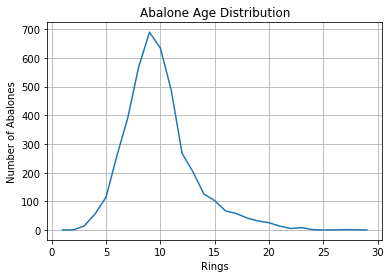

In [20]:
# Parse out Rings column from dataset
rings = [d['Rings'] for d in dataset]
rings.sort()

# Count number of abalones with each number of rings with defaultdict
abalone_rings = defaultdict(int)
for r in rings:
    abalone_rings[r] += 1
X = list(abalone_rings.keys())
Y = list(abalone_rings.values())

# Customize plot
plt.gca().set(xlabel='Rings', ylabel='Number of Abalones',
       title='Abalone Age Distribution')
plt.grid()#affiche les carreaux

# Show the plot of Rings vs Number of Abalones
plt.plot(X, Y)
plt.show()

### Histograms

Histograms show the distribution of numeric continuous variables with central tendency and skewness. **Using the line plot data from above, plot a histogram showing the distribution of abalone age.** 

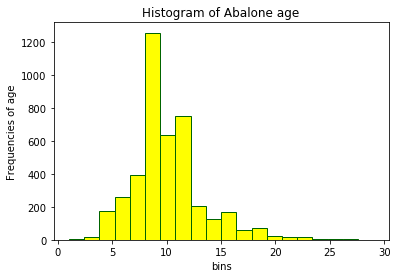

In [22]:
# Flatten distribution list into frequency distribution
age_freq = []
for key in abalone_rings.keys():
    for i in range(0, abalone_rings.get(key)):
        age_freq.append(key)
#print(age_freq[:10])


# Plot your histogram here
#fig, axs = plt.subplots(1,2)#visualiser plusieurs graphiques
n_bins = 20
# N is the count in each bin, bins is the lower-limit of the bin
plt.hist(age_freq, bins=n_bins, color = 'yellow', edgecolor = 'darkgreen')
plt.xlabel('bins')
plt.ylabel('Frequencies of age')
plt.title('Histogram of Abalone age')

plt.show()


### Scatter Plots

Scatter plots show the strength of a relationship between two variables (also known as correlations). I see that larger abalones tend to be larger, at least from a numbers perspective. **Let's see if this is actually true by creating a scatter plot showing the relationship between `Rings` and `Length`.** 


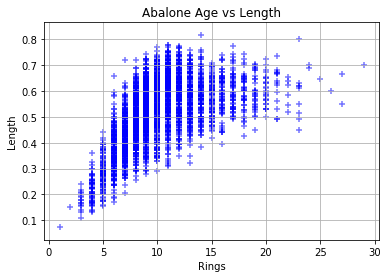

In [23]:
# Complete this cell with a scatter plot of age vs length
rings = [d['Rings'] for d in dataset]
length = [d['Length'] for d in dataset]
plt.grid(True)
plt.gca().set(xlabel='Rings', ylabel='Length', title='Abalone Age vs Length')
plt.scatter(rings, length, c = 'blue', edgecolor = 'none', s = 30, marker = '+', alpha = 0.55)

### Bar Plots

Bar plots are great for comparing categorical variables. There are a few subtypes of bar plots, such as the grouped bar chart or stacked bar chart. Since we have the `Sex` field to play with, we can compare data across `M` and `F` abalones. Below is a simple stacked bar chart comparing the `Sex` category with the `Shucked Weight` data. **Create a bar chart of your choice of data.** 


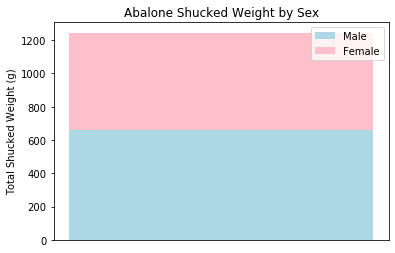

In [24]:
# Example Stacked Bar Chart - Comparisons Between Sexes
Mweight = sum([d['Shucked Weight'] for d in dataset if d['Sex'] is 'M'])
Fweight = sum([d['Shucked Weight'] for d in dataset if d['Sex'] is 'F'])
index = [1]

p1 = plt.bar(index, Mweight, color='lightblue')
p2 = plt.bar(index, Fweight, bottom=Mweight, color='pink')
plt.gca().set(title='Abalone Shucked Weight by Sex', ylabel='Total Shucked Weight (g)');
plt.xticks([])

plt.legend((p1[0], p2[0]), ('Male', 'Female'))
plt.show()

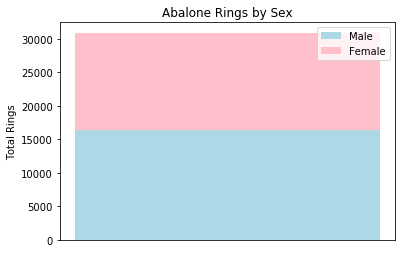

In [25]:
Mrings = sum([d['Rings'] for d in dataset if d['Sex'] is 'M'])
Frings = sum([d['Rings'] for d in dataset if d['Sex'] is 'F'])
d = [Mrings, Frings]
index = [1]

p1 = plt.bar(index, Mrings, color='lightblue')
p2 = plt.bar(index, Frings, bottom=Mrings, color='pink')
plt.gca().set(title='Abalone Rings by Sex', ylabel='Total Rings');
plt.xticks([])
plt.legend((p1[0], p2[0]), ('Male', 'Female'))

plt.legend((p1[0], p2[0]), ('Male', 'Female'))
plt.show()


### Box Plots

Box plots are useful for comparing distributions of data and are commonly found in research papers. The box portion of a box plot represents 50% of the data, and there are versions where you can mark outliers and other extremes. We have the distribution of rings already from the line plot example under the variable name `age_freq`.

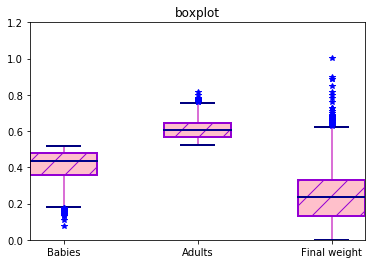

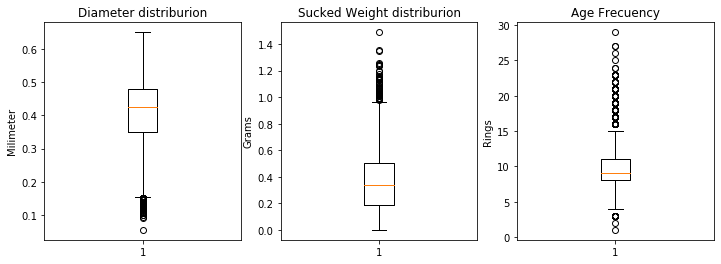

In [27]:
babies = [d['Length'] for d in dataset if d['Length'] <= x]
adults = [d['Length'] for d in dataset if d['Length'] > x]
final = [d['Shell Weight'] for d in dataset]
boxplotElements = plt.boxplot([babies,adults,final], sym = 'b*', whis = 1.5,
                                 widths = [1, 1, 1], positions = [1, 3, 5],
                                 patch_artist = True)
plt.gca().xaxis.set_ticklabels(['Babies', 'Adults', 'Final weight'])
for element in boxplotElements['medians']:
    element.set_color('darkblue')
    element.set_linewidth(2)
for element in boxplotElements['boxes']:
    element.set_edgecolor('darkviolet')
    element.set_facecolor('pink')
    element.set_linewidth(2)
    element.set_linestyle('solid')
    element.set_fill(True)
    element.set_hatch('/')
for element in boxplotElements['whiskers']:
    element.set_color('orchid')
    element.set_linewidth(2)
for element in boxplotElements['caps']:
    element.set_color('navy')
    element.set_linewidth(2)    
plt.ylim(0, 1.2)
plt.title('boxplot')


fig, axs = plt.subplots(1, 3, figsize=(12, 4))
s_weight = [d['Shucked Weight'] for d in dataset]
dia = [d['Diameter'] for d in dataset]
axs[0].boxplot(dia)
axs[0].set_title('Diameter distriburion')
axs[0].set_ylabel('Milimeter')
axs[1].boxplot(s_weight)
axs[1].set_title('Sucked Weight distriburion')
axs[1].set_ylabel('Grams')
axs[2].boxplot(age_freq)
axs[2].set_title('Age Frecuency')
axs[2].set_ylabel('Rings')
plt.show()

plt.show()


(array([ 3.,  2.,  7., 12., 19., 21., 35., 65., 62., 93.]),
 array([0.275 , 0.2995, 0.324 , 0.3485, 0.373 , 0.3975, 0.422 , 0.4465,
        0.471 , 0.4955, 0.52  ]),
 <a list of 10 Patch objects>)

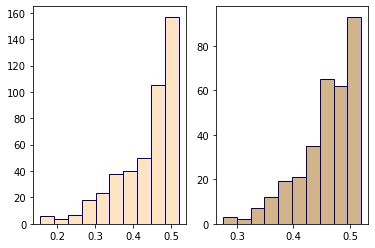

In [29]:
##Focus on baby abalones sex 
Mbabies = [d['Length'] for d in dataset if d['Length'] <= x and d['Sex'] is 'M']
Fbabies = [d['Length'] for d in dataset if d['Length'] <= x and d['Sex'] is 'F']
fig, axs = plt.subplots(1,2)
axs[0].hist(Mbabies, color = 'bisque', edgecolor = 'navy')
axs[1].hist(Fbabies, color = 'tan', edgecolor = 'navy')


---

## Part 4: Web Scraping

**BeautifulSoup Documentation:** https://www.crummy.com/software/BeautifulSoup/bs4/doc/

 Here is another way to parse a webpage with BeautifulSoup. We will be using a short story from Project Gutenberg [(*Little Boy*](http://www.gutenberg.org/files/58743/58743-h/58743-h.htm)  by Harry Neal, 1954) as an example.


### Introduction to Beautiful Soup

Below are a few useful commands we will be using throughout the next section as we parse a webpage.

In [30]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [31]:
# Open and extract HTML from the webpage
f = urlopen("http://www.gutenberg.org/files/58743/58743-h/58743-h.htm")
html = str(f.read())

# First 100 characters of the HTML we grabbed
html[:100]

'b\'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"\\r\\n    "http://www.w3.org/TR/xhtml1/DTD/x'

In [32]:
# Convert our HTML object to a BeautifulSoup object and make it readable
soup = BeautifulSoup(html, 'html.parser')
print(soup.prettify())

b'
<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"\r\n    "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
\r\n
<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
 \r\n
 <head>
  \r\n
  <meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
  \r\n
  <meta content="text/css" http-equiv="Content-Style-Type"/>
  \r\n
  <title>
   \r\n      The Project Gutenberg eBook of Little Boy, by Harry Neal.\r\n
  </title>
  \r\n
  <link href="images/cover.jpg" rel="coverpage"/>
  \r\n\r\n
  <style type="text/css">
   \r\n\r\nbody {\r\n    margin-left: 10%;\r\n    margin-right: 10%;\r\n}\r\n\r\n    h1,h2 {\r\n    text-align: center; /* all headings centered */\r\n    clear: both;\r\n}\r\n\r\np {\r\n    margin-top: .51em;\r\n    text-align: justify;\r\n    margin-bottom: .49em;\r\n}\r\n\r\nhr {\r\n    width: 33%;\r\n    margin-top: 2em;\r\n    margin-bottom: 2em;\r\n    margin-left: 33.5%;\r\n    margin-right: 33.5%;\r\n    clear: both;\r\n}\r\n\r\nhr.chap {w

With a BeautifulSoup object, we can easily search through HTML and create lists and other structures.

In [33]:
# Number of paragraph tags
len(soup.find_all('p'))

165

In [34]:
# Create list of all paragraphs
paragraph_list = soup.find_all('p')
paragraph_list[100]

<p>Slowly he felt his own lips curl back into an expression he could\r\nhardly remember. He felt the way he felt sometimes late at night when,\r\nsafe and alone in his room, he would play a little with his toys. He\r\ndidn\'t feel like killing her any more. He felt like ... like <i>friends</i>.</p>

We can also extract all the text from a page and use it to create a bag of words or other measures.

In [35]:
# Extract all text from page
text = soup.get_text()
text[:100]

"b'\\r\\n\\r\\n  \\r\\n    \\r\\n    \\r\\n    \\r\\n      The Project Gutenberg eBook of Little Boy, by Harry Ne"

In [36]:
import string
from collections import defaultdict

letters = defaultdict(int)
punctuation = set(string.punctuation)

for char in text:
    if char not in punctuation:
        letters[char] += 1
    
letters.items()

dict_items([('b', 606), ('r', 3584), ('n', 3875), (' ', 8120), ('T', 160), ('h', 2200), ('e', 4941), ('P', 119), ('o', 2988), ('j', 116), ('c', 981), ('t', 3686), ('G', 119), ('u', 1049), ('g', 866), ('B', 61), ('k', 453), ('f', 802), ('L', 74), ('i', 2376), ('l', 1371), ('y', 759), ('H', 138), ('a', 2751), ('N', 74), ('d', 1741), ('m', 844), ('1', 68), ('0', 23), ('2', 16), ('x', 54), ('s', 1993), ('p', 660), ('5', 28), ('4', 19), ('9', 12), ('w', 849), ('3', 25), ('6', 10), ('7', 18), ('I', 135), ('v', 315), ('z', 12), ('8', 16), ('E', 130), ('U', 53), ('S', 181), ('Y', 40), ('A', 110), ('R', 71), ('D', 49), ('J', 7), ('C', 48), ('O', 71), ('F', 75), ('K', 11), ('W', 34), ('M', 33), ('—', 54), ('q', 42), ('V', 8), ('X', 2), ('Q', 1)])

### Creating Dataset

![Cooking](./chef.jpg)


In [37]:
# Open and extract HTML from the webpage
f = urlopen("https://gazettereview.com/2017/04/top-10-chefs/")
html = str(f.read())
soup = BeautifulSoup(html, 'html.parser')
print(soup.prettify())

b'
<!DOCTYPE doctype html >
\n
<!--[if IE 8]><html class="ie8" lang="en"> <![endif]-->
\n
<!--[if IE 9]><html class="ie9" lang="en"> <![endif]-->
\n
<!--[if gt IE 8]><!-->
<html lang="en-US">
 <!--<![endif]-->
 <head>
  <title>
   Top 10 Chefs In The World - The Best in 2018 - Gazette Review
  </title>
  <meta charset="utf-8"/>
  <link href="\'https://fonts.googleapis.com/css?family=Open+Sans%3A300italic%2C400italic%2C600italic%2C400%2C600%2C700&amp;ver=5.3.3\'" id="\'google_font_open_sans-css\'" media="\'all\'" rel="\'stylesheet\'" type="\'text/css\'"/>
  <link href="\'https://fonts.googleapis.com/css?family=Roboto%3A500%2C400italic%2C700%2C900%2C500italic%2C400%2C300&amp;ver=5.3.3\'" id="\'google_font_roboto-css\'" media="\'all\'" rel="\'stylesheet\'" type="\'text/css\'"/>
  <link data-optimized="\'2\'" href="\'https://gazettereview.com/min/038c5.css\'" rel="\'stylesheet\'"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="https://gazettereview

Note that all the names of the chefs are between `<h2>` and `</h2>` tags and the descriptions are between `<p>` and `</p>` tags. We can get the names of the chefs quite easily, as seen below.

In [38]:
# List of chef names
# Note that find_all() returns a bs4 object, rather than a Python list.
# The HTML tags are also part of the object.
chefs = soup.find_all('h2')
print(type(chefs))
print(chefs[0])

<class 'bs4.element.ResultSet'>
<h2>10. Anthony Bourdain</h2>


In [41]:
# Clean and strip spaces and numbers from the bs4 element and turn it into a Python list
import string
letters = set(string.ascii_letters)
chef_name = []

# Grab relevant letters/spaces and remove extra HTML tags and spaces
for chef in chefs:
    chef = [letter for letter in str(chef) if letter in letters or letter is ' ']
    chef = ''.join(chef[2:len(chef) - 1])
    chef_name.append(chef)

chef_name

['Anthony Bourdain',
 'Paul Bocuse',
 'Alain Ducasse',
 'Emeril Lagasse',
 'Vikas Khanna',
 'Marco Pierre White',
 'Heston Blumenthal',
 'Wolfgang Puck',
 'Jamie Oliver',
 'Gordon Ramsay']

Getting the list of chef names is trivial with the `find_all()` function (and a little Python cleaning), but what about the descriptions? This is a little trickier since there may be overlapping uses for the `<p>` and `</p>` tags, so let's try [navigating the BeautifulSoup tree](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#navigating-the-tree).

This website is simple in that every chef has a two-paragraph description in the same format. We can use this to our advantage once we know what to look for. Let's say we want to extract just the text from these two paragraphs. How can we do so? With the `.contents` attribute, we can access the children of each tag.

In [42]:
descriptions = soup.find_all('p')
del descriptions[-12:]
del descriptions[0]
print("The number of paragraphs is:", len(descriptions))
descriptions[:2]

The number of paragraphs is: 21


[<p><img alt="" class="size-medium wp-image-65278 alignleft" height="300" sizes="(max-width: 200px) 100vw, 200px" src="https://gazettereview.com/wp-content/uploads/2017/04/Anthony-Bourdain-200x300.jpg" srcset="https://gazettereview.com/wp-content/uploads/2017/04/Anthony-Bourdain-200x300.jpg 200w, https://gazettereview.com/wp-content/uploads/2017/04/Anthony-Bourdain-280x420.jpg 280w, https://gazettereview.com/wp-content/uploads/2017/04/Anthony-Bourdain.jpg 320w" width="200"/><br/>\nIt\xe2\x80\x99s hard to believe that the world renowned chef, writer, and television personality Anthony Bourdain\xe2\x80\x99s career started out with him washing dishes as a college dropout. He is now one of the most popular travel and food personalities. Although he is no longer officially a chef, his career spanned several decades. He was a chef at elite restaurants in New York such as the Supper Club, Sullivan\xe2\x80\x99s, and One Fifth Avenue.</p>,
 <p>Bourdain has written several successful novels abou

We now have lists with the names, descriptions, and images of the chefs!

In [45]:
chef_data = {}

chef_data['Name'] = chef_name
chef_data['Description'] = chef_description
chef_data['Image'] = chef_image

chef_data['Description'][0]

' \\nIt\\xe2\\x80\\x99s hard to believe that the world renowned chef, writer, and television personality Anthony Bourdain\\xe2\\x80\\x99s career started out with him washing dishes as a college dropout. He is now one of the most popular travel and food personalities. Although he is no longer officially a chef, his career spanned several decades. He was a chef at elite restaurants in New York such as the Supper Club, Sullivan\\xe2\\x80\\x99s, and One Fifth Avenue. Bourdain has written several successful novels about his culinary adventures. His shows are well known by his comedic and often profane commentary. He is also famous for the travel and food series No Reservations. Bourdain also has a blue belt in Brazilian Jiu Jitsu.'

### Web-Scraping

*Note: If you run into a `HTTP error 403 (Forbidden)`, this means that the site probably blocks web-scraping scripts. You can get around this by modifying the way you request the URL (see [StackOverflow](https://stackoverflow.com/questions/28396036/python-3-4-urllib-request-error-http-403) for some useful tips) or try another site.*

In [52]:
# Experiment on a Turkish website web scrapping

In [46]:
# Open and extract HTML from the webpage
f = urlopen("https://cepkolik.com/telefon-karsilastirma/apple-iphone-x-ve-xiaomi-redmi-8/?g3=0&g4=0&pn")
html = str(f.read())

# First 100 characters of the HTML we grabbed
html[:100]

'b\'<!doctype html >\\r\\n<html lang="tr">\\r\\n<head>\\r\\n    <meta charset="UTF-8" /><style id="litespeed'

In [47]:
# Convert our HTML object to a BeautifulSoup object and make it readable
soup = BeautifulSoup(html, 'html.parser')
print(soup.prettify())

b'
<!DOCTYPE doctype html >
\r\n
<html lang="tr">
 \r\n
 <head>
  \r\n
  <meta charset="utf-8"/>
  <style id="litespeed-optm-css-rules">
   .clearfix:after,.clearfix:before{display:table;content:"";line-height:0}.clearfix:after{clear:both}html{font-family:sans-serif;-ms-text-size-adjust:100%;-webkit-text-size-adjust:100%}body{margin:0}header,section{display:block}a{background-color:transparent}strong{font-weight:700}img{border:0}button,input{color:inherit;font:inherit;margin:0}button{overflow:visible}button{text-transform:none}button,html input[type=button]{-webkit-appearance:button}button::-moz-focus-inner,input::-moz-focus-inner{border:0;padding:0}input{line-height:normal}table{border-collapse:collapse;border-spacing:0}td,th{padding:0}body{visibility:visible!important}*{-webkit-box-sizing:border-box;-moz-box-sizing:border-box;box-sizing:border-box}:after,:before{-webkit-box-sizing:border-box;-moz-box-sizing:border-box;box-sizing:border-box}img{max-width:100%;height:auto}.td-main-cont

In [48]:
# Number of paragraph tags
len(soup.find_all('p'))

8

In [49]:
# Create list of all paragraphs
paragraph_list = soup.find_all('p')
paragraph_list[2]

<p><strong>Apple iPhone X</strong> 6 \xc3\xa7ekirdekli <strong>Apple A11 Bionic</strong> i\xc5\x9flemci ve 3 GB RAM ile \xc3\xa7al\xc4\xb1\xc5\x9f\xc4\xb1r ve t\xc3\xbcm bu donan\xc4\xb1mlar\xc4\xb1 g\xc3\xbcn boyu \xc3\xa7al\xc4\xb1\xc5\x9ft\xc4\xb1rmak i\xc3\xa7in <strong>2716 mAh</strong> g\xc3\xbcc\xc3\xbcnde batarya kullan\xc4\xb1r. Xiaomi Redmi 8 ise g\xc3\xbcc\xc3\xbcn\xc3\xbc 8 \xc3\xa7ekirdekli <strong>Qualcomm Snapdragon 439</strong> i\xc5\x9flemci ve <strong>4 GB</strong> RAM\'den al\xc4\xb1r. Bu telefonun pili ise <strong>5000 mAh</strong> g\xc3\xbcc\xc3\xbcndedir. <strong>Apple iPhone X</strong>\'da kablosuz \xc5\x9farj deste\xc4\x9fi Var, h\xc4\xb1zl\xc4\xb1 \xc5\x9farj deste\xc4\x9fi Var. <strong>Xiaomi Redmi 8</strong>\'da ise kablosuz \xc5\x9farj deste\xc4\x9fi Yok, h\xc4\xb1zl\xc4\xb1 \xc5\x9farj deste\xc4\x9fi Var.</p>

In [50]:
# Extract all text from page
text = soup.get_text()
text[:10]

"b'\\r\\n\\r\\n"

In [51]:
import string
from collections import defaultdict

letters = defaultdict(int)
punctuation = set(string.punctuation)

for char in text:
    if char not in punctuation:
        letters[char] += 1
    
letters.items()

dict_items([('b', 3048), ('r', 7695), ('n', 11337), (' ', 41517), ('c', 4155), ('l', 4940), ('e', 8636), ('a', 7771), ('f', 3405), ('i', 7671), ('x', 3336), ('t', 10429), ('o', 6911), ('d', 4866), ('s', 3894), ('p', 3983), ('y', 969), ('h', 2429), ('g', 2246), ('0', 3083), ('m', 3747), ('z', 620), ('j', 161), ('u', 2519), ('1', 2343), ('w', 1240), ('k', 1508), ('7', 688), ('v', 778), ('6', 810), ('8', 712), ('5', 909), ('X', 110), ('2', 1172), ('4', 1129), ('9', 882), ('3', 1490), ('S', 354), ('F', 99), ('N', 78), ('T', 216), ('R', 125), ('U', 45), ('I', 228), ('H', 115), ('L', 131), ('G', 161), ('V', 95), ('q', 41), ('P', 266), ('M', 242), ('D', 209), ('W', 118), ('Z', 60), ('O', 179), ('A', 284), ('K', 156), ('C', 125), ('B', 129), ('E', 91), ('Y', 130), ('Q', 26), ('J', 54)])